In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\DS notes\SQL\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
df.drop(['Status', 'unnamed1'], axis=1 , inplace = True)

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [13]:
df['Amount']= df['Amount'].astype('int')

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df[["Amount"]].describe()

,Amount
count,11239.000000
mean,9453.610553
std,5222.355168
min,188.000000
25%,5443.000000
50%,8109.000000
75%,12675.000000
max,23952.000000


DATA ANALYSIS

Gender

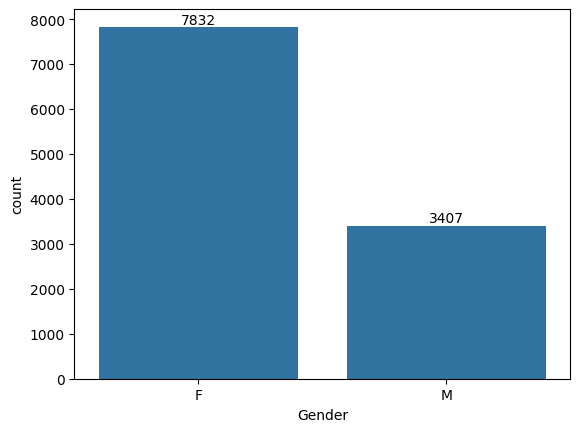

In [22]:
gn =  sns.countplot(x= "Gender", data = df)

for bars in gn.containers:
    gn.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

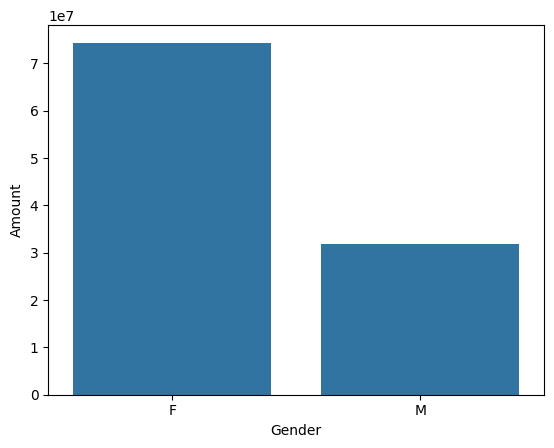

In [25]:
sales_gn = df.groupby(['Gender'], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x='Gender', y='Amount',data = sales_gn)

According to the above Graphs we can say that most of the buyers are Females and the Purchasing power of Females are greater then mens.

AGE:

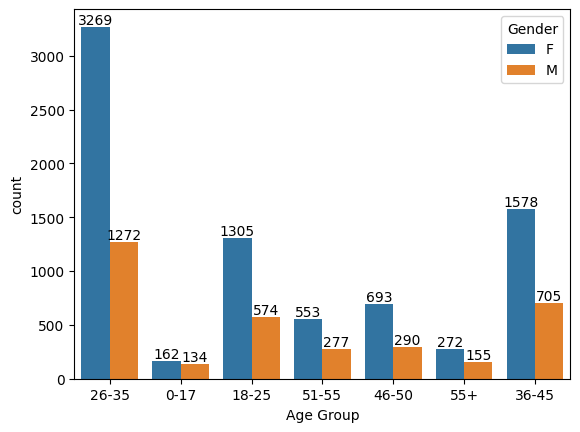

In [30]:
gn =  sns.countplot(x= "Age Group",hue= 'Gender', data = df)

for bars in gn.containers:
    gn.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

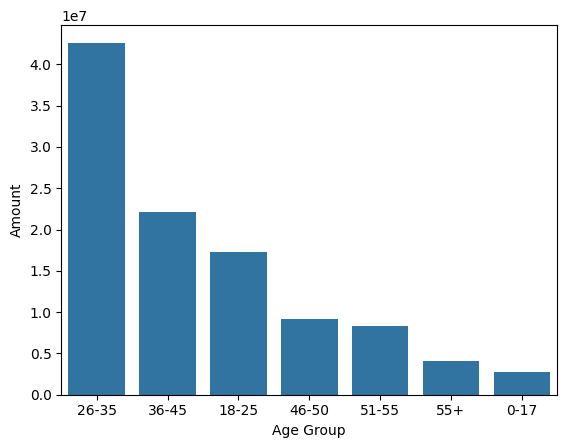

In [31]:
sales_age = df.groupby(['Age Group'], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x='Age Group', y='Amount',data = sales_age)

From the above Graphs We can conclude that most of the buyers are From the Age group 26-35 and Females are more Compare to males.

STATE:

<Axes: xlabel='State', ylabel='Orders'>

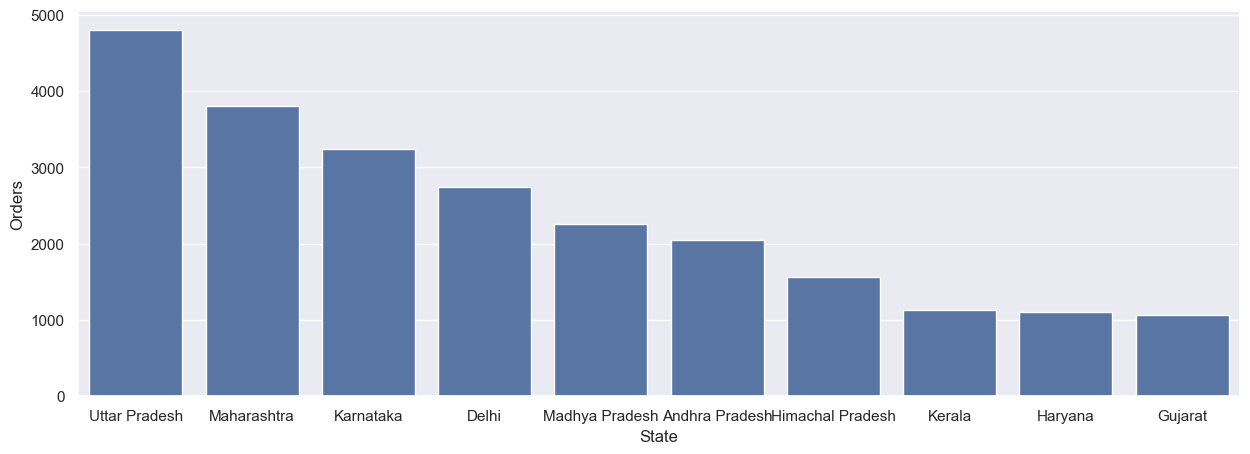

In [35]:
sales_state = df.groupby(['State'], as_index = False)["Orders"].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={"figure.figsize":(15,5)})

sns.barplot(x='State', y='Orders',data = sales_state)



<Axes: xlabel='State', ylabel='Amount'>

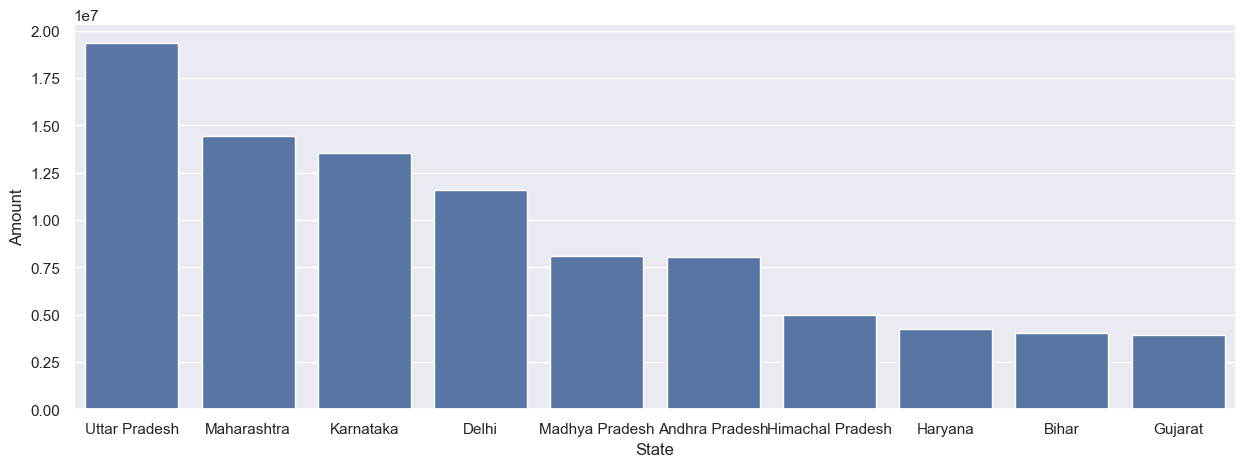

In [36]:
sales_state = df.groupby(['State'], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={"figure.figsize":(15,5)})

sns.barplot(x='State', y='Amount',data = sales_state)

*From the above data most of the sales is from Uttar Pradesh , Maharastra and Karnataka and also the Amount/sales is maximum in these States respectevely*

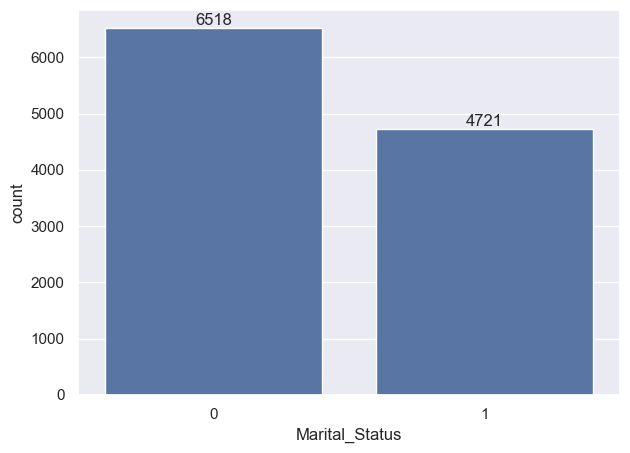

In [39]:
gn =  sns.countplot(x= "Marital_Status", data = df)
sns.set(rc={"figure.figsize":(4,5)})

for bars in gn.containers:
    gn.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

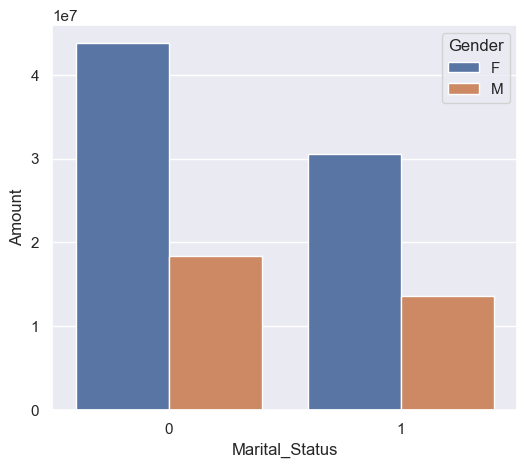

In [40]:
sales_ms = df.groupby(['Marital_Status','Gender'], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={"figure.figsize":(6,5)})

sns.barplot(x='Marital_Status', y='Amount',hue= 'Gender',data = sales_ms)

*From the Above Graphs most of the Buyers are Married (Women) and their Purchasing Power is also Maximum*

OCUPATION:

<Axes: xlabel='Occupation', ylabel='Orders'>

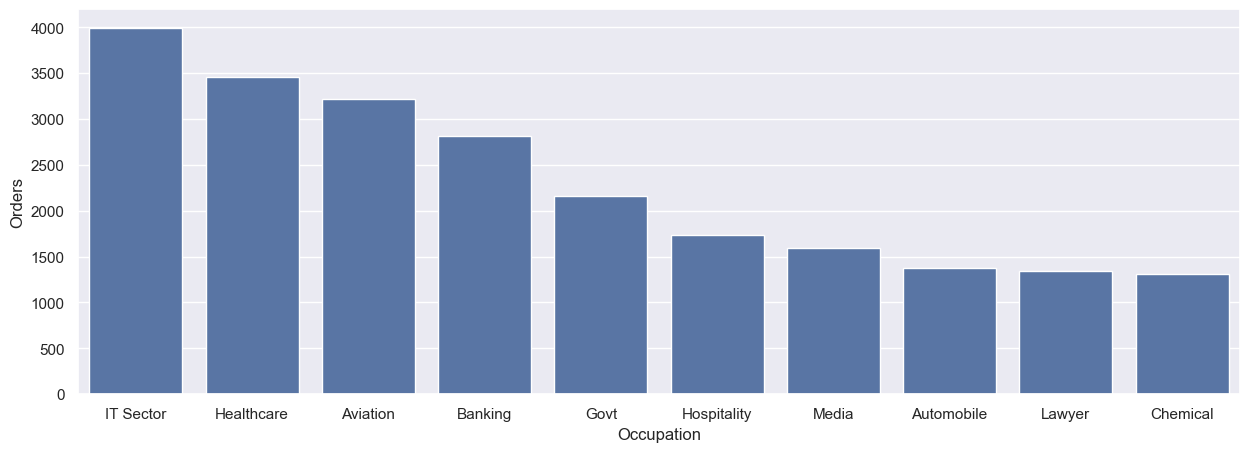

In [42]:
sales_ocup = df.groupby(['Occupation'], as_index = False)["Orders"].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={"figure.figsize":(15,5)})

sns.barplot(x='Occupation', y='Orders',data = sales_ocup)

<Axes: xlabel='Occupation', ylabel='Amount'>

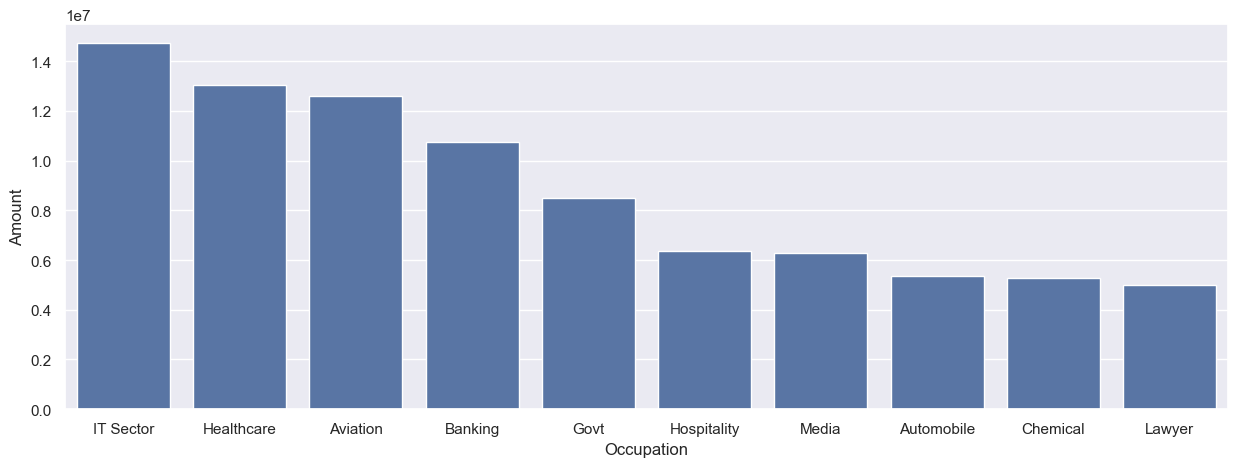

In [43]:
sales_ocup = df.groupby(['Occupation'], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={"figure.figsize":(15,5)})

sns.barplot(x='Occupation', y='Amount',data = sales_ocup)

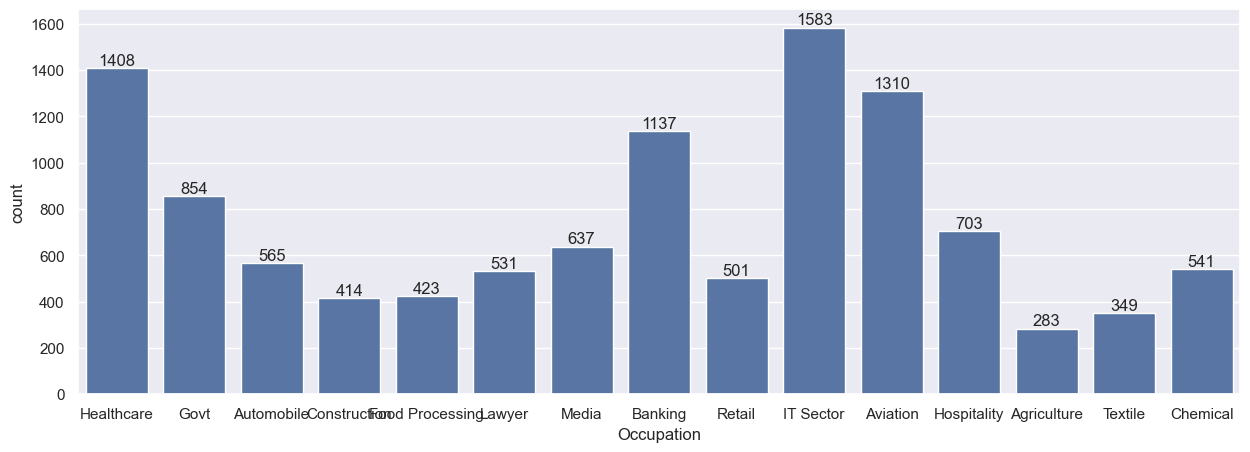

In [45]:
gn =  sns.countplot(x= "Occupation", data = df)

for bars in gn.containers:
    gn.bar_label(bars)

*From the above graphs Most of the orders are From IT Sector (1583) then Health care(1408) then Aviation(1310). And so on 
 Most of the sales amount are also from these three Occupation Respectevely.*

PRODUCT_CATEGORY :

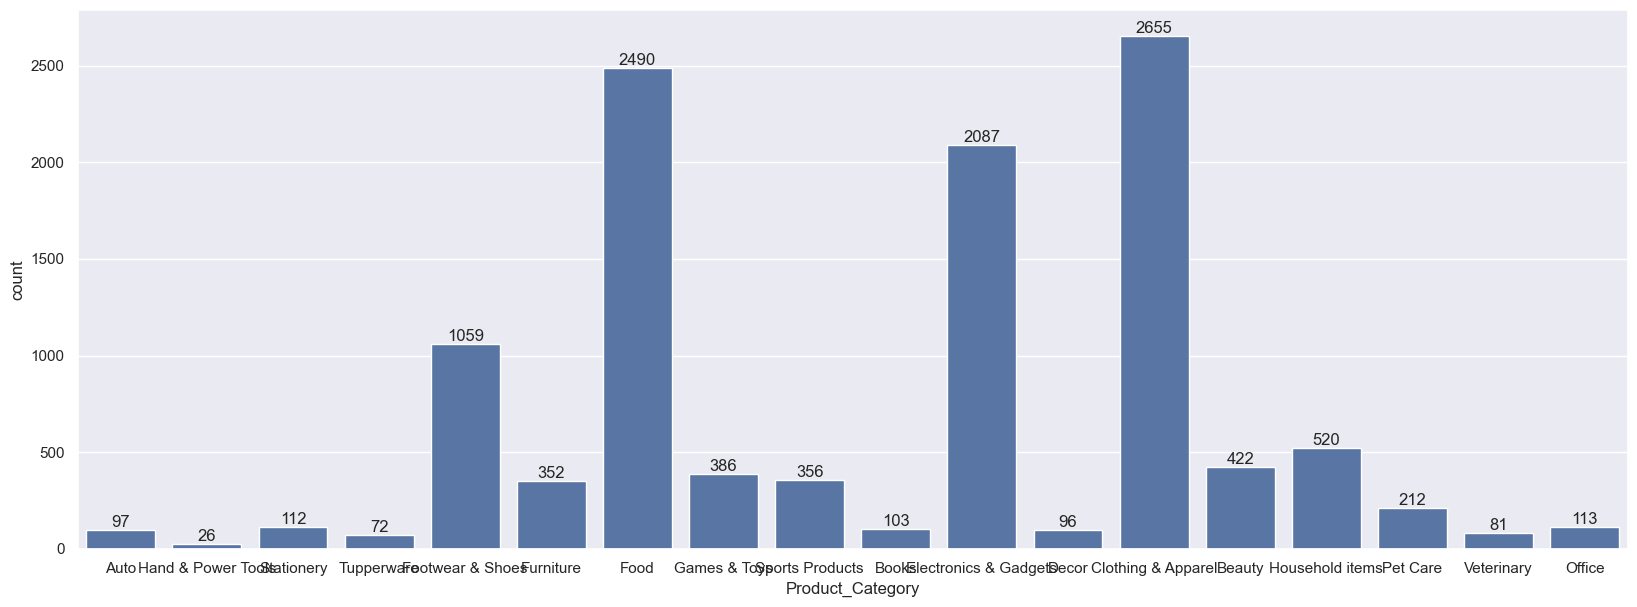

In [53]:
gn =  sns.countplot(x= "Product_Category", data = df)
sns.set(rc={"figure.figsize":(20,10)})

for bars in gn.containers:
    gn.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

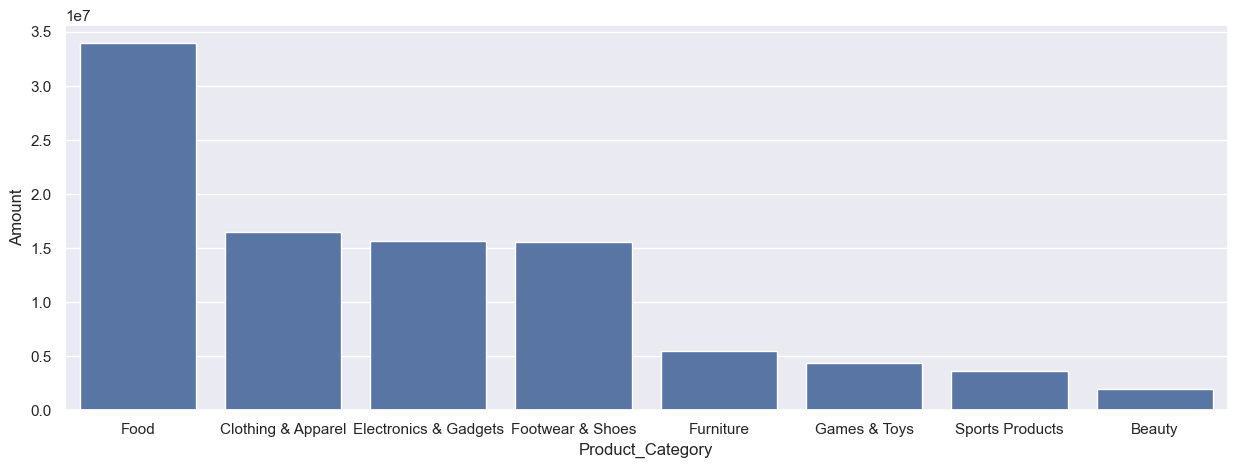

In [56]:
sales_pi = df.groupby(['Product_Category'], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(8)

sns.set(rc={"figure.figsize":(15,5)})

sns.barplot(x='Product_Category', y='Amount',data = sales_pi)

According to the Graph top 5 Purchasing Product_category are :
1- Clothing & Apparel(2655)
2- Food(2490)
3- Electronics And Gadgets(2087)
4- Footwear & Shoes (1059)
5- House hold items(520)

But According to the sale/amount Food > Clothing and Apparel > Electronics  & Gadgets > Footwear & Shoes are at top.

<Axes: xlabel='Product_ID', ylabel='Orders'>

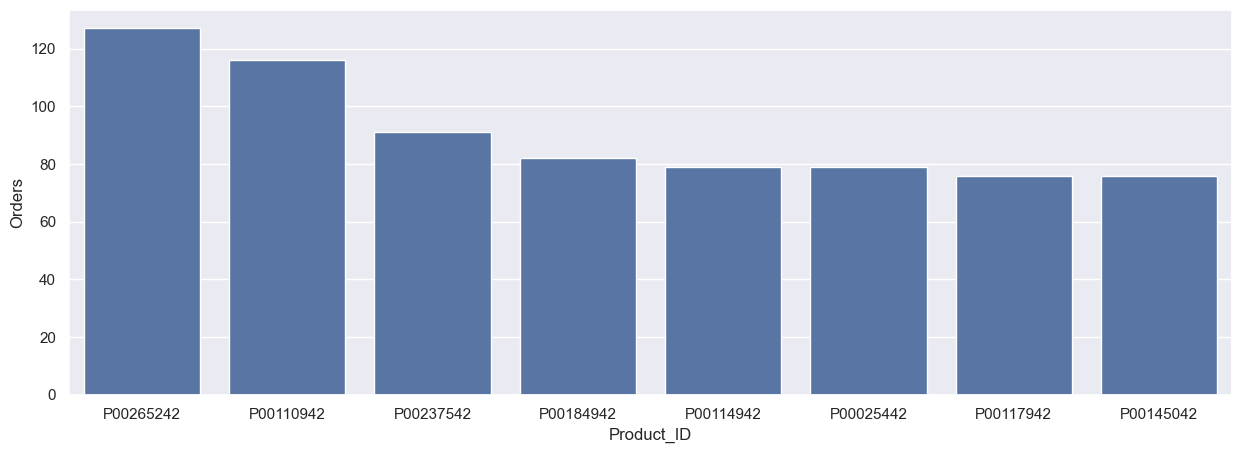

In [58]:
sales_top = df.groupby(['Product_ID'], as_index = False)["Orders"].sum().sort_values(by = 'Orders', ascending = False).head(8)

sns.set(rc={"figure.figsize":(15,5)})

sns.barplot(x='Product_ID', y='Orders',data = sales_top)

 AND THE TOP 3 SELLING PRODUCT ARE (P00265242)> (P00110942) > (P00237542).

CONCLUSION:

*MARRIED WOMENS OF AGE GROUP 26-35YRS FROM UP, MAHARASTRA AND KARNATAKA WORING IN IT , HEALTH CARE AND AVIATION ARE MORE LIKELY TO BUY PRODUCTS FROM FOOD , CLOTHING AND ELECTRONICS CATEGORY.*